In [575]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OrdinalEncoder

In [576]:
df = pd.read_csv("./data/datasetFpmIcuStayDetail.csv")

In [577]:
df.head()

,icustay_id,age,pulmonary,pao2fio2,mingcs,heartrate_mean,wbc_min,wbc_max,sysbp_mean,urineoutput,...,hospstay_seq,first_hosp_stay,intime,outtime,los_icu,icustay_seq,first_icu_stay,elixhauser_vanwalraven,elixhauser_sid29,elixhauser_sid30
0,205907,50.645076,3,NaN,15.0,114.774194,32.1,36.1,138.966667,5.0,...,1,t,2161-07-31 17:00:41,2161-08-12 16:50:22,11.9928,1,t,12.0,18.0,20.0
1,216788,60.761024,0,NaN,15.0,92.071429,7.4,7.4,100.489362,1500.0,...,1,t,2177-01-01 11:28:00,2177-01-05 11:34:00,4.0042,1,t,0.0,-1.0,6.0
2,211038,64.889926,0,NaN,15.0,89.371429,10.0,10.0,103.228571,1766.0,...,1,t,2147-11-10 12:38:00,2147-11-12 17:44:00,2.2125,1,t,0.0,-2.0,-2.0
3,200728,56.996581,0,NaN,14.0,88.189189,9.5,18.8,154.365854,2135.0,...,1,t,2151-01-04 13:05:15,2151-01-06 14:59:35,2.0794,1,t,7.0,8.0,17.0
4,202996,64.887600,3,128.571429,15.0,89.310345,7.3,13.3,143.606061,2700.0,...,1,t,2139-10-05 16:14:41,2139-10-27 15:36:18,21.9733,1,t,0.0,0.0,0.0


In [578]:
df.pop("subject_id")
df.pop("hadm_id")
df.pop("dod")
df.pop("admittime")
df.pop("dischtime")
df.pop("los_hospital")
df.pop("ethnicity")
df.pop("ethnicity_grouped")
df.pop("hospital_expire_flag")
df.pop("hospstay_seq")
df.pop("first_hosp_stay")
df.pop("intime")
df.pop("outtime")
df.pop("icustay_seq")
df.pop("first_icu_stay")
df.pop("gender")
print("Related columns are poped from the dataframe")

Related columns are poped from the dataframe


In [579]:
for colName, numNull in zip(df.columns, df.isna().sum()):
    if(numNull > (df.shape[0]) * (45 / 100)):
        print("Dropping column {} with number of {} null values".format(colName, numNull))
        df.pop(colName)

In [580]:
df = df.drop_duplicates(subset="icustay_id")
df.pop("icustay_id")
df

,age,pulmonary,pao2fio2,mingcs,heartrate_mean,wbc_min,wbc_max,sysbp_mean,urineoutput,pco2,po2,icu_level,admission_type,los_icu,elixhauser_vanwalraven,elixhauser_sid29,elixhauser_sid30
0,50.645076,3,NaN,15.0,114.774194,32.1,36.1,138.966667,5.0,26.0,68,3,EMERGENCY,11.9928,12.0,18.0,20.0
1,60.761024,0,NaN,15.0,92.071429,7.4,7.4,100.489362,1500.0,50.0,308,1,ELECTIVE,4.0042,0.0,-1.0,6.0
2,64.889926,0,NaN,15.0,89.371429,10.0,10.0,103.228571,1766.0,41.0,396,1,ELECTIVE,2.2125,0.0,-2.0,-2.0
3,56.996581,0,NaN,14.0,88.189189,9.5,18.8,154.365854,2135.0,36.0,118,1,EMERGENCY,2.0794,7.0,8.0,17.0
4,64.887600,3,128.571429,15.0,89.310345,7.3,13.3,143.606061,2700.0,41.0,90,1,EMERGENCY,21.9733,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108271,52.750732,0,NaN,14.0,84.269231,3.7,8.0,117.166667,4225.0,28.0,94,1,EMERGENCY,2.0929,3.0,6.0,6.0
108305,64.819398,0,NaN,8.0,107.321429,15.0,18.0,159.321429,2740.0,41.0,56,2,EMERGENCY,2.0889,2.0,3.0,6.0
108316,71.148891,0,NaN,13.0,108.500000,18.1,18.1,106.318182,2380.0,41.0,63,1,ELECTIVE,6.3445,11.0,3.0,7.0
108337,71.486196,0,NaN,14.0,79.826087,15.3,19.4,144.904762,2550.0,53.0,98,1,EMERGENCY,2.0040,4.0,5.0,4.0


In [581]:
df = df.dropna()
df

,age,pulmonary,pao2fio2,mingcs,heartrate_mean,wbc_min,wbc_max,sysbp_mean,urineoutput,pco2,po2,icu_level,admission_type,los_icu,elixhauser_vanwalraven,elixhauser_sid29,elixhauser_sid30
4,64.887600,3,128.571429,15.0,89.310345,7.3,13.3,143.606061,2700.0,41.0,90,1,EMERGENCY,21.9733,0.0,0.0,0.0
6,75.282648,1,184.999993,3.0,81.166667,15.8,21.3,103.585714,720.0,29.0,111,3,EMERGENCY,9.2577,7.0,10.0,17.0
7,79.226124,1,182.000000,12.0,90.000000,15.7,17.3,143.212121,3615.0,42.0,91,1,EMERGENCY,7.8532,9.0,13.0,21.0
10,33.173848,1,462.499993,13.0,86.447368,25.0,25.0,105.483871,5960.0,49.0,185,1,ELECTIVE,8.2080,6.0,4.0,13.0
12,48.100704,1,434.000000,14.0,86.760000,12.9,14.5,107.240000,81.0,31.0,217,2,ELECTIVE,4.3343,8.0,10.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107975,84.740974,3,65.000000,15.0,70.120000,9.5,14.2,95.608696,350.0,42.0,65,3,EMERGENCY,6.8745,12.0,23.0,35.0
108022,40.816924,3,130.000000,15.0,72.692308,8.5,14.2,108.000000,930.0,57.0,65,1,EMERGENCY,8.7643,4.0,2.0,3.0
108101,67.574334,3,72.000000,15.0,86.576923,7.3,7.3,97.923077,2280.0,45.0,72,1,EMERGENCY,3.8344,7.0,7.0,13.0
108127,52.419743,0,425.000000,15.0,81.708333,9.3,11.6,100.458333,2413.0,35.0,170,1,EMERGENCY,2.9155,6.0,4.0,5.0


In [582]:
encoder = OrdinalEncoder()
for colName, colType in zip(df.columns, df.dtypes):
    if(colType == "int64"):
        print(colName, colType)
    if(colType == "float64"):
        print(colName, colType)
    if(colType == "object"):
        print(colName, colType)
        df[colName] = encoder.fit_transform(df[[colName]])          

age float64
pulmonary int64
pao2fio2 float64
mingcs float64
heartrate_mean float64
wbc_min float64
wbc_max float64
sysbp_mean float64
urineoutput float64
pco2 float64
po2 int64
icu_level int64
admission_type object
los_icu float64
elixhauser_vanwalraven float64
elixhauser_sid29 float64
elixhauser_sid30 float64


C:\Users\hakve\AppData\Local\Temp\ipykernel_6740\1112477174.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colName] = encoder.fit_transform(df[[colName]])


In [583]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [584]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('los_icu')
test_labels = test_features.pop('los_icu')

In [585]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [586]:
train_features

,age,pulmonary,pao2fio2,mingcs,heartrate_mean,wbc_min,wbc_max,sysbp_mean,urineoutput,pco2,po2,icu_level,admission_type,elixhauser_vanwalraven,elixhauser_sid29,elixhauser_sid30
40040,26.355485,0,466.000000,14.0,64.680000,7.6,10.6,116.500000,2165.0,42.0,233,1,1.0,4.0,-3.0,4.0
87610,66.104766,1,403.333333,3.0,92.948718,5.2,8.4,137.500000,2085.0,32.0,121,2,2.0,16.0,21.0,24.0
7137,69.270993,3,580.000000,3.0,93.090909,6.3,17.0,113.041667,2470.0,54.0,290,3,1.0,-1.0,-1.0,6.0
40484,75.948506,0,162.000000,9.0,87.960000,7.3,7.3,148.960000,4485.0,48.0,81,1,1.0,23.0,30.0,43.0
7067,42.718358,3,121.428571,15.0,102.866667,11.0,16.4,105.677419,305.0,47.0,85,3,1.0,7.0,13.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29704,54.048159,1,340.000000,15.0,91.027027,14.9,14.9,97.604651,2195.0,33.0,170,1,2.0,0.0,-1.0,-1.0
82042,78.712366,3,139.999998,15.0,109.285714,16.2,18.6,80.885714,2655.0,35.0,112,3,2.0,40.0,40.0,55.0
6176,33.798748,1,312.500000,15.0,100.545455,13.5,17.9,147.640000,3140.0,42.0,125,1,1.0,-10.0,-12.0,-16.0
88106,81.536177,1,452.499993,8.0,61.031250,4.5,7.8,115.567568,248.0,41.0,181,3,1.0,12.0,22.0,33.0


In [587]:
normalizer.adapt(np.array(train_features))

In [588]:
print(normalizer.mean.numpy())

[[6.35983505e+01 1.36966574e+00 2.70301056e+02 1.34504175e+01
  8.80593872e+01 1.12563791e+01 1.56671791e+01 1.17931343e+02
  1.93147461e+03 4.13366814e+01 1.50890121e+02 1.44262779e+00
  8.87042999e-01 9.13902664e+00 1.06629190e+01 1.56189556e+01]]


In [589]:
train_features

,age,pulmonary,pao2fio2,mingcs,heartrate_mean,wbc_min,wbc_max,sysbp_mean,urineoutput,pco2,po2,icu_level,admission_type,elixhauser_vanwalraven,elixhauser_sid29,elixhauser_sid30
40040,26.355485,0,466.000000,14.0,64.680000,7.6,10.6,116.500000,2165.0,42.0,233,1,1.0,4.0,-3.0,4.0
87610,66.104766,1,403.333333,3.0,92.948718,5.2,8.4,137.500000,2085.0,32.0,121,2,2.0,16.0,21.0,24.0
7137,69.270993,3,580.000000,3.0,93.090909,6.3,17.0,113.041667,2470.0,54.0,290,3,1.0,-1.0,-1.0,6.0
40484,75.948506,0,162.000000,9.0,87.960000,7.3,7.3,148.960000,4485.0,48.0,81,1,1.0,23.0,30.0,43.0
7067,42.718358,3,121.428571,15.0,102.866667,11.0,16.4,105.677419,305.0,47.0,85,3,1.0,7.0,13.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29704,54.048159,1,340.000000,15.0,91.027027,14.9,14.9,97.604651,2195.0,33.0,170,1,2.0,0.0,-1.0,-1.0
82042,78.712366,3,139.999998,15.0,109.285714,16.2,18.6,80.885714,2655.0,35.0,112,3,2.0,40.0,40.0,55.0
6176,33.798748,1,312.500000,15.0,100.545455,13.5,17.9,147.640000,3140.0,42.0,125,1,1.0,-10.0,-12.0,-16.0
88106,81.536177,1,452.499993,8.0,61.031250,4.5,7.8,115.567568,248.0,41.0,181,3,1.0,12.0,22.0,33.0


In [590]:
model = tf.keras.Sequential([
    normalizer,
    keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_28 (Normaliza  (None, 16)               33        
 tion)                                                           
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 50
Trainable params: 17
Non-trainable params: 33
_________________________________________________________________


In [591]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

In [592]:
history = model.fit(
    train_features,
    train_labels,
    epochs=50,
    validation_split = 0.2)

Epoch 1/50
196/196 [==============================] - 1s 2ms/step - loss: 7.2675 - val_loss: 6.5345
Epoch 2/50
196/196 [==============================] - 0s 1ms/step - loss: 5.6323 - val_loss: 5.3901
Epoch 3/50
196/196 [==============================] - 0s 1ms/step - loss: 4.9892 - val_loss: 5.0899
Epoch 4/50
196/196 [==============================] - 0s 1ms/step - loss: 4.8126 - val_loss: 5.0077
Epoch 5/50
196/196 [==============================] - 0s 1ms/step - loss: 4.7627 - val_loss: 4.9758
Epoch 6/50
196/196 [==============================] - 0s 1ms/step - loss: 4.7457 - val_loss: 4.9818
Epoch 7/50
196/196 [==============================] - 0s 1ms/step - loss: 4.7375 - val_loss: 4.9689
Epoch 8/50
196/196 [==============================] - 0s 1ms/step - loss: 4.7385 - val_loss: 4.9860
Epoch 9/50
196/196 [==============================] - 0s 1ms/step - loss: 4.7362 - val_loss: 4.9744
Epoch 10/50
196/196 [==============================] - 0s 1ms/step - loss: 4.7363 - val_loss: 4.9672

In [593]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
45,4.734969,4.970158,45
46,4.737974,4.970021,46
47,4.733895,4.966450,47
48,4.738102,4.971545,48
49,4.736146,4.974431,49


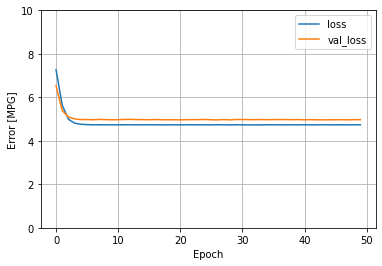

In [594]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)
plt.show()

In [609]:
model_dnn = keras.Sequential([
    normalizer,
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])
model_dnn.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

In [610]:
model_dnn.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_28 (Normaliza  (None, 16)               33        
 tion)                                                           
                                                                 
 dense_25 (Dense)            (None, 64)                1088      
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7,394
Trainable params: 7,361
Non-trainable params: 33
__________________________________________________

In [611]:
history = model_dnn.fit(
    train_features,
    train_labels,
    validation_split=0.2, epochs=50)

Epoch 1/50
196/196 [==============================] - 1s 2ms/step - loss: 5.1868 - val_loss: 5.0812
Epoch 2/50
196/196 [==============================] - 0s 2ms/step - loss: 4.7967 - val_loss: 5.0188
Epoch 3/50
196/196 [==============================] - 0s 2ms/step - loss: 4.7435 - val_loss: 5.0078
Epoch 4/50
196/196 [==============================] - 0s 2ms/step - loss: 4.7161 - val_loss: 4.9967
Epoch 5/50
196/196 [==============================] - 0s 2ms/step - loss: 4.6833 - val_loss: 4.9668
Epoch 6/50
196/196 [==============================] - 0s 2ms/step - loss: 4.6620 - val_loss: 5.0021
Epoch 7/50
196/196 [==============================] - 0s 2ms/step - loss: 4.6516 - val_loss: 4.9644
Epoch 8/50
196/196 [==============================] - 0s 2ms/step - loss: 4.6245 - val_loss: 4.9877
Epoch 9/50
196/196 [==============================] - 0s 1ms/step - loss: 4.6064 - val_loss: 4.9733
Epoch 10/50
196/196 [==============================] - 0s 2ms/step - loss: 4.5884 - val_loss: 4.9952

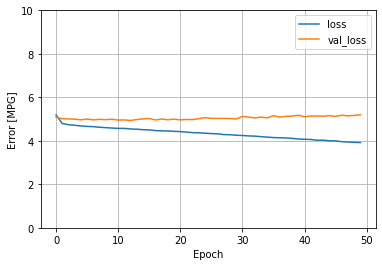

In [612]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)
plt.show()

62/62 [==============================] - 0s 1ms/step


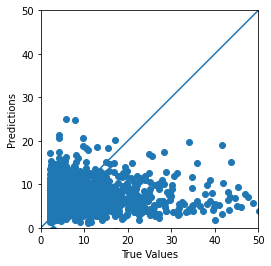

In [613]:
test_predictions = model_dnn.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)